<div> 
<h1>Multimedia</h1>
</div>

<p>
En este cuaderno, damos una breve explicacion acerca de como integrar objetos multimedia (audio, imagen y video) en un cuaderno Jupyter. Se abordan 2 alternativas: integracion directa empleando etiquetas HTML asi como tambien integracion empleando el modulo <code>IPython.display</code>.
</p>

## Objectos de Audio

### Audio: etiqueta HTML `<audio>`

La etiqueta HTML `<audio>` define un reproductor de audio en el navegador y permite reproducir un archivo de audio especifico (MP3, WAV, OGG), ver [aqui](https://www.w3schools.com/Tags/tag_audio.asp) para detalles. La etiqueta `<audio>` puede emplearse dentro de una celda de texto y no requiere Python. 

<audio src="../data/B/FMP_B_Note-C4_Piano.mp3" type="audio/mpeg" controls="controls"></audio>

### Audio: empleo de  <code>IPython.display.Audio</code>

Una alternativa es emplear el modulo <code>IPython.display</code>. En lo que refiere al audio, la clase siguiente esta disponible:

`IPython.display.Audio(data=None, filename=None, url=None, embed=None, rate=None, autoplay=False, normalize=True, *, element_id=None)`

Cuando se emplea en una celda de codigo, <code>IPython.display.audio</code> genera un reproductor de audio. Las siguientes 2 opciones son conceptualmente diferentes: 

* Cuando se emplea el argumento `filename`, el archivo de audio se carga desde la direccion dada y es **incrustado** en el cuaderno (por defecto `embed=True`). 
* Cuando se emplea el argumento `url`, el reproductor es **enlazado** al archivo de audio a traves de la direccion URL dada (por defecto `embed=False`). 

El siguiente ejemplo ilustra la diferencia entre ambas opciones. 

In [10]:
import os
import IPython.display as ipd
import librosa
import numpy as np
%matplotlib inline

path_filename = os.path.join('..','data','B','FMP_B_Note-C4_Piano.mp3')

print('archivo de audio incrustado:')
audio_element_filename = ipd.Audio(filename=path_filename)
ipd.display(audio_element_filename)

print('archivo de audio enlazado:')
audio_element_url = ipd.Audio(url=path_filename)
ipd.display(audio_element_url)

archivo de audio incrustado:


archivo de audio enlazado:


### Audio: WAV and MP3

El siguiente ejemplo ilustra la diferencia en tamaños de archivo de audio entre WAV y MP3.

In [11]:
path_filename_wav = os.path.join('..','data','B','FMP_B_Note-C4_Piano.wav')
audio_element_wav = ipd.Audio(filename=path_filename_wav)
print('tamaño de <audio> (archivo incrustado WAV): %s Bytes'
      % len(audio_element_wav._repr_html_().encode('utf8')))
ipd.display(audio_element_wav)

path_filename_mp3 = os.path.join('..','data','B','FMP_B_Note-C4_Piano.mp3')
audio_element_mp3 = ipd.Audio(filename=path_filename_mp3)
print('tamaño de <audio> (archivo incrustado MP3): %s Bytes' 
      % len(audio_element_mp3._repr_html_().encode('utf8')))
ipd.display(audio_element_mp3)

tamaño de <audio> (archivo incrustado WAV): 121640 Bytes


tamaño de <audio> (archivo incrustado MP3): 22910 Bytes


### Audio: forma de Onda de la señal

Es posible emplear `IPython.display.Audio` a fin de incrustar una señal de audio basada en una onda. El siguiente ejemplo muestra como leer un archivo WAV y MP3 empleando el paquete Python `librosa`. En ambos casos, los archivos de audio se convierten a representacion de onda.

In [23]:
import warnings
warnings.filterwarnings('ignore')

x_wav, Fs_wav = librosa.load(path_filename_wav, sr=None)
audio_wav = ipd.Audio(data=x_wav,rate=Fs_wav)
print('tamaño de <audio> (origen WAV): %s Bytes'
      % len(audio_wav._repr_html_().encode('utf8')))
ipd.display(audio_wav)

x_mp3, Fs_mp3 = librosa.load(path_filename_mp3, sr=None)
audio_mp3 = ipd.Audio(data=x_mp3,rate=Fs_mp3)
print('tamaño de <audio> (origen MP3): %s Bytes'
      % len(audio_mp3._repr_html_().encode('utf8')))
ipd.display(audio_mp3)

tamaño de <audio> (origen WAV): 121636 Bytes


tamaño de <audio> (origen MP3): 126244 Bytes


El siguiente ejemplo ilustra como generar una señal de audio stereo y como incrustar la misma en un cuaderno Jupyter. Para explicar el ejemplo de codigo, referimos al [cuaderno sobre formas de onda](../C1/C1S3_Waveform.ipynb).

In [30]:
Fs=2000
duration=4
t = np.linspace(0,duration,Fs*duration)
signal_left = np.sin(2*np.pi*200*t)
signal_right = np.sin(2*np.pi*600*t)
signal_stereo = [signal_left, signal_right]
ipd.Audio(signal_stereo, rate=Fs)

## Objectos de Imagen

### Imagen: etiqueta HTML `<img>`

Existen varias formas de integrar objetos de imagen en cuadernos Jupyter. En primer lugar, es posible emplear la [etiqueta `<img>`](https://www.w3schools.com/Tags/tag_img.asp) en una celda de texto sin requerir Python. La siguiente figura ilustra una matriz auto-similar (SSM) de un registro de audio, referimos a Seccion 4.2.2 del libro de texto <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015].</a>

<img src="../data/B/FMP_B_Brahms-SSM.png" width="300px" align="middle" alt="C0">

HTML permite asimismo mostrar archivos animados GIF. Este simple formato encripta una serie de cuadros o imagenes para crear una breve animacion. Por ejemplo, el siguiente GIF muestra la SSM previa en su forma original en secuencia con otras versiones obtenidas al aplicar procesos de suavizado y umbralizacion.

<img src="../data/B/FMP_B_Brahms-SSM.gif" width="300px" alt="SSM">

### Imagen: Empleo de <code>IPython.display.Image</code>

Una alternativa es hacer uso del modulo <code>IPython.display</code> para generar una imagen dada la direccion al archivo PNG/JPEG/GIF. En lo que refiere a imagen, la clase siguiente esta disponible:

`IPython.display.Image(data=None, url=None, filename=None, format=None, embed=None, width=None, height=None, retina=False, unconfined=False, metadata=None)`

En forma analoga al caso del audio, existen 2 opciones: 

* Cuando se emplea el argumento `filename`, el archivo de imagen se carga desde la direccion dada y es **incrustado** en el cuaderno (por defecto `embed=True`). 
* Cuando se emplea el argumento `url`, el dato es **enlazado** a traves de la direccion URL dada (por defecto `embed=False`). 

Aqui se muestran 2 ejemplos.

archivo de imagen incrustado:


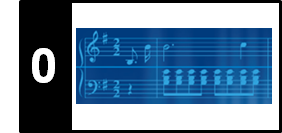

archivo de imagen enlazado:


In [31]:
path_filename = os.path.join('..','data','B','FMP_B_Chapters_C0_nav.png')

print('archivo de imagen incrustado:')
ipd.display(ipd.Image(filename=path_filename,width=100))

print('archivo de imagen enlazado:')
ipd.display(ipd.Image(url=path_filename,width=100))

### Imagen: Disponer en arreglo

A fin de visualizar varias imagenes dispuestas en fila, es posible tener acceso a la [libreria Python `pandas`](https://pandas.pydata.org/), la cual brinda herramientas de analisis de estructura de datos.

In [32]:
import os
import pandas as pd
import IPython.display as ipd

f_img1 = os.path.join('..','data','B','FMP_B_Chapters_C0_nav.png')
f_img2 = os.path.join('..','data','B','FMP_B_Chapters_C1_nav.png')
f_img3 = os.path.join('..','data','B','FMP_B_Chapters_C2_nav.png')
f_img4 = os.path.join('..','data','B','FMP_B_Chapters.gif')

img1 = ipd.Image(url=f_img1,width=100)._repr_html_()
img2 = ipd.Image(url=f_img2,width=100)._repr_html_()
img3 = ipd.Image(url=f_img3,width=100)._repr_html_()
img4 = ipd.Image(url=f_img4,width=100)._repr_html_()

# Generation of two-dimensional tabular data structure (with rows and columns)
df = pd.DataFrame({'images': [img1,img2,img3,img4]})
print(df)

# Rendering of a DataFrame as an HTML table
ipd.display(ipd.HTML(df.T.to_html(escape=False,header=False,index=False)))

                                              images
0  <img src="../data/B/FMP_B_Chapters_C0_nav.png"...
1  <img src="../data/B/FMP_B_Chapters_C1_nav.png"...
2  <img src="../data/B/FMP_B_Chapters_C2_nav.png"...
3  <img src="../data/B/FMP_B_Chapters.gif" width=...


,,,


### Imagen: Generacion e Interaccion 

Existen varias formas de generar e interactuar con imagenes empleando Python e integrarlas en un cuaderno Jupyter. El cuaderno <a href="B_06_PythonVisualization.ipynb">Visualizacion con Python</a> aborda este tema.

## Objetos de Video 

### Video: etiqueta HTML `<video>`

En primera instancia, es posible emplear la etiqueta `<video>` en una celda de texto sin requerir Python. La siguiente figura exhibe un video correspondiente a una interfaz de usuario la cual facilita la navegacion a traves de diferentes interpretaciones de una pieza musical, referimos a Seccion 3.1.1.1 del libro de texto <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015].</a>

<video src="../data/B/FMP_B_InterpretationSwitcher_small.mp4" type="movie.mp4" width="400" controls="controls"></video>

### Video: Empleo de <code>IPython.display.Video</code>

Una alternativa consiste en usar el modulo <code>IPython.display</code>. El siguiente ejemplo muestra como integrar un video por medio de un objeto enlazado:

In [34]:
import os
import IPython.display as ipd
path_filename = os.path.join('..','data','B','FMP_B_InterpretationSwitcher_small.mp4')
ipd.display(ipd.Video(path_filename))

### Video: Empleo de <code>IPython.display.YouTubeVideo</code>

YouTube ofrece una fuente abundante de videos, los cuales es posible integrar en un cuaderno Jupyter. La siguiente clase puede emplearse a fin de incrustar un reproductor de video YouTube basado en su identificador ID.

`IPython.display.YouTubeVideo(id,width=400,height=300,**kwargs)`

El siguiente video YouTube presenta una introduccion a las caracteristicas *chroma* y sus aplicaciones en el campo **MIR**, referimos al Capitulo 3 del libro de texto <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015].</a> El identificador ID puede encontrarse en la direccion URL de YouTube.  

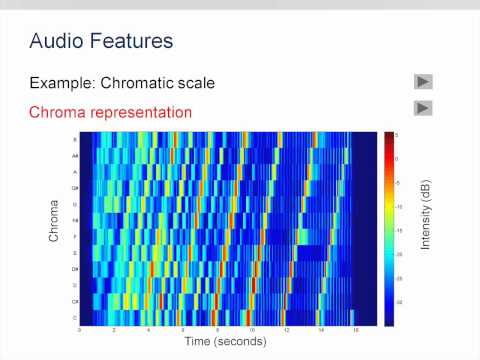

In [35]:
import IPython.display as ipd
ipd.display(ipd.YouTubeVideo('PF05xP1NqUM',width=600,height=450))

In [3]:
from IPython.core.display import HTML
css_file = '.././styles/numericalmoocstyle.css'
HTML(open(css_file, 'r').read())